# Data exploration

In [2]:
# reset variables
%reset -f

# import external modules
import sys, os
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc 

from cognite.client import CogniteClient
client = CogniteClient(api_key=os.environ['COGNITE_API_SECRET'])

from functions import get_stats_properties, split_dataset

# Set global paths
ROOT_PATH = os.path.abspath(".").split("src")[0]

# configure matplotlib params and plotting
sns.set()
sns.set_context('paper')
sns.set_style('whitegrid', {'axes.grid': True, 'grid.linestyle': '--'})

rc('figure', figsize=(12,6))
rc('xtick', labelsize=12)
rc('ytick', labelsize=12)
rc('axes', labelsize=13, titlesize=14)
rc('legend', fontsize=14, handlelength=2)
rc('font', family='serif')

SEED=100
np.random.seed(SEED)

In [ ]:
# read data
path = ROOT_PATH + "data/scaled/"

train_scaled = np.load(path + "data_scaled_train.npy")
valid_scaled = np.load(path + "data_scaled_valid.npy")
test_scaled = np.load(path + "data_scaled_test.npy")
x_scaled, y_scaled = split_dataset(train_scaled)

path = ROOT_PATH + "data/"
selected_train = np.load(path + "feature_selection/boruta/train_bor.npy")
selected_valid = np.load(path + "feature_selection/boruta/valid_bor.npy")
selected_test = np.load(path + "feature_selection/boruta/test_bor.npy")

print(x_train.shape, y_train.shape)

# read metadata
path = ROOT_PATH + "data/metadata/"
headers = pd.read_csv(path + "headers.csv", header=None)[0].values
target_tags = pd.read_csv(path + "tags/target_tags.csv", sep=";")["Name"].values
selected_tags = pd.read_csv(path + "tags/selected_tags_boruta.csv", sep=",")

ts = np.load(path + "timestamps/dtimestamps.npy")
ts_train = np.load(path + "timestamps/ts_train.npy")
ts_valid = np.load(path + "timestamps/ts_valid.npy")
ts_test = np.load(path + "timestamps/ts_test.npy")

In [15]:
scaled_data = train_scaled
selected_data = selected_train

print(scaled_data.shape)
print(selected_data.shape)

# test that targets are equal for selected and scaled data
assert np.all(selected_data[:,:3] == scaled_data[:,:3])

# test that the mean is equal for all selected targets
all_tags = np.concatenate((target_tags, selected_tags["Tag"].values))
stats_orig = get_stats_properties(pd.DataFrame(scaled_data, columns=headers))
stats_select = get_stats_properties(pd.DataFrame(selected_data, columns=all_tags))

# check that mean is the same for all selected tags
for i in range(len(selected_tags)):   
    tag = selected_tags.iloc[i]
    mean_orig = stats_orig.loc[tag["Tag"]]["Mean"]
    mean_select = stats_select.loc[tag["Tag"]]["Mean"]
    
    assert mean_orig == mean_select

(53211, 98)
(53211, 23)


In [16]:
stats_orig.head()

Mean    Median  Std        Max       Min  \
VAL_23-FT-92537-01:X.Value  4.123376e-13 -0.039641  1.0  15.822383 -4.253872   
VAL_23-TT-92539:X.Value     8.193335e-13  0.021758  1.0   4.409000 -5.102087   
VAL_23-PT-92539:X.Value    -4.210220e-14  0.010321  1.0   6.424608 -3.816025   
VAL_23-FT-92512:X.Value    -4.121460e-14  0.084032  1.0  13.967981 -6.663702   
VAL_23-FT-92521:X.Value     2.839020e-14  0.300919  1.0   3.614939 -4.131121   

                             1st Qu.   3rd Qu.  NAs  
VAL_23-FT-92537-01:X.Value -0.667874  0.623688  0.0  
VAL_23-TT-92539:X.Value    -0.586582  0.648859  0.0  
VAL_23-PT-92539:X.Value    -0.734723  0.720526  0.0  
VAL_23-FT-92512:X.Value    -0.539224  0.674204  0.0  
VAL_23-FT-92521:X.Value    -0.209168  0.587918  0.0

In [17]:
stats_select.head()

Mean    Median  Std        Max  \
VAL_23-FT-92537-01:X.Value      4.123376e-13 -0.039641  1.0  15.822383   
VAL_23-TT-92539:X.Value         8.193335e-13  0.021758  1.0   4.409000   
VAL_23-PT-92539:X.Value        -4.210220e-14  0.010321  1.0   6.424608   
VAL_23-KA-9101-M01-62B:X.Value -3.975503e-13  0.004233  1.0  12.697046   
VAL_23-KA-9101_APH:VALUE       -2.300195e-13  0.026808  1.0  13.536696   

                                      Min   1st Qu.   3rd Qu.  NAs  
VAL_23-FT-92537-01:X.Value      -4.253872 -0.667874  0.623688  0.0  
VAL_23-TT-92539:X.Value         -5.102087 -0.586582  0.648859  0.0  
VAL_23-PT-92539:X.Value         -3.816025 -0.734723  0.720526  0.0  
VAL_23-KA-9101-M01-62B:X.Value  -5.057942 -0.666315  0.666217  0.0  
VAL_23-KA-9101_APH:VALUE       -56.976041 -0.450260  0.505639  0.0

## Plots and distributions

In [22]:
X, y = split_dataset(selected_data)

In [31]:
print(selected_tags["Tag"][f])

VAL_23-KA-9101-M01-62B:X.Value


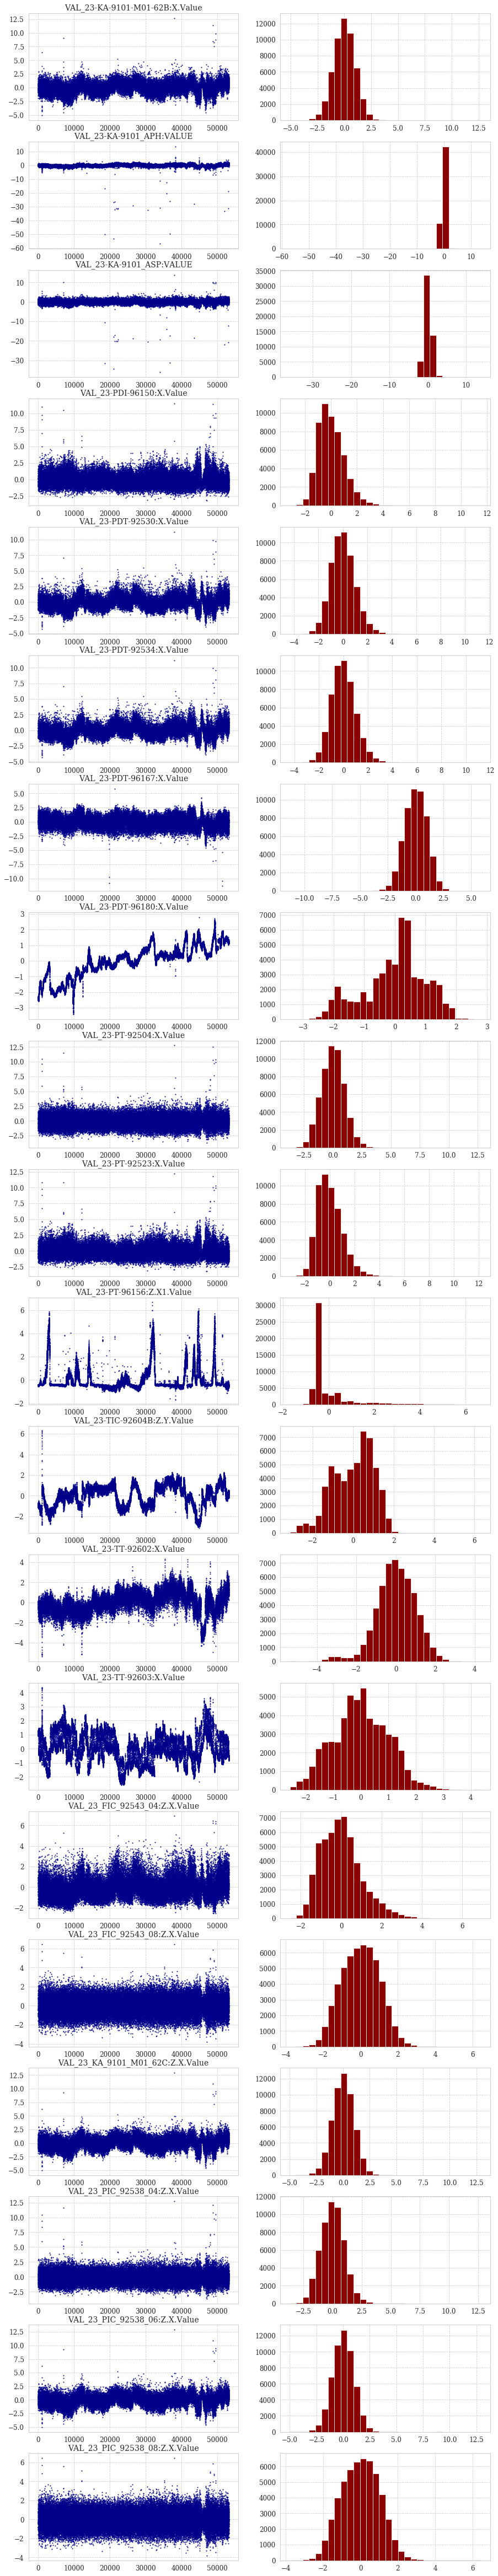

In [35]:
fig, axs = plt.subplots(nrows=int(X.shape[-1]), ncols=2, figsize=(15,85))
f = 0

for figrow in range(X.shape[-1]):
    ax1,ax2 = axs[figrow,0], axs[figrow,1]
    
    ax1.plot(X[:,f], color="darkblue", marker="o", markersize=1.0, lw=0)
    ax1.set_title(selected_tags["Tag"][f])
    
    ax2.hist(X[:,f], bins=30, color="darkred")
    f +=1

fig.show()

#### Autocorrelation

In [ ]:
selected_train.shape

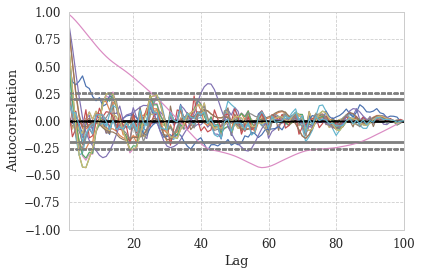

In [40]:
data = selected_train
tags = np.concatenate((target_tags, selected_tags["Tag"].values))

for target in range(len(selected_tags)):
    pd.plotting.autocorrelation_plot(pd.DataFrame(data[:100,target], columns=[tags[target]]))

#### Variable correlation

In [41]:
def plot_correlation(df, title="Correlation plot"):
    corr = df.corr()

    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(15, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap,
                square=True, linewidths=1, cbar_kws={"shrink": .6})

    ax.set_title(title)
    
    return f

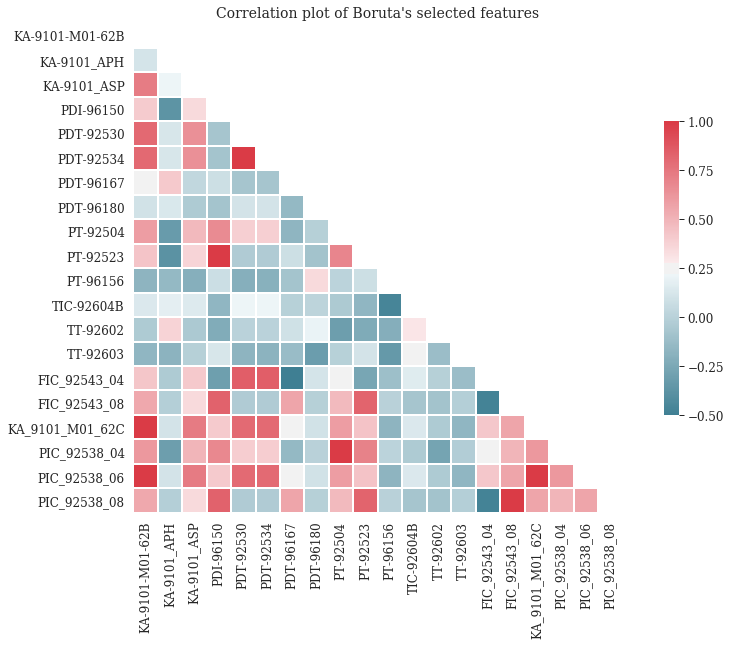

In [42]:
colnames = [name.split("VAL_23")[1][1:].split(":")[0] for name in selected_tags["Tag"]]
df = pd.DataFrame(selected_data[:,len(target_tags):], columns=colnames)

fig = plot_correlation(df, "Correlation plot of selected features")
fig.show()